In [144]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
from tensorflow import keras
import math

##LOAD DATA

In [145]:
rps, info = tfds.load('rock_paper_scissors', with_info=True)


In [146]:
train_data = list(rps['train'].as_numpy_iterator())
X_train = [instance['image'] for instance in train_data]
y_train = [instance['label'] for instance in train_data]

test_data = list(rps['test'].as_numpy_iterator())
X_test = [instance['image'] for instance in test_data]
y_test = [instance['label'] for instance in test_data]


##SPLIT


In [147]:

train_size = len(X_train)
val_size = int(0.1 * train_size)
X_train, X_val = X_train[:-val_size], X_train[-val_size:]
y_train, y_val = y_train[:-val_size], y_train[-val_size:]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)


print("Training :", X_train.shape, y_train.shape)
print("Validation :", X_val.shape, y_val.shape)
print("Testing :", X_test.shape, y_test.shape)


Training : (2268, 300, 300, 3) (2268,)
Validation : (252, 300, 300, 3) (252,)
Testing : (372, 300, 300, 3) (372,)


##CNN

In [148]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [149]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 2, 2, 128)        

In [150]:
model.add(layers.Flatten())


##CLASSIFIER

In [151]:
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 2, 2, 128)        

##COMPILE

In [152]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [153]:
import cv2


input_shape = (32, 32)


X_train_resized = [cv2.resize(image, input_shape) for image in X_train]


X_test_resized = [cv2.resize(image, input_shape) for image in X_test]


X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)


In [154]:
history = model.fit(X_train_resized, y_train, epochs=5, validation_data=(X_test_resized, y_test))


Epoch 1/5
71/71 [==============================] - 7s 75ms/step - loss: 4.8572 - accuracy: 0.6014 - val_loss: 0.9233 - val_accuracy: 0.6452
Epoch 2/5
71/71 [==============================] - 3s 49ms/step - loss: 0.1567 - accuracy: 0.9669 - val_loss: 0.7642 - val_accuracy: 0.7742
Epoch 3/5
71/71 [==============================] - 4s 51ms/step - loss: 0.0305 - accuracy: 0.9974 - val_loss: 0.6944 - val_accuracy: 0.7903
Epoch 4/5
71/71 [==============================] - 5s 70ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.7445 - val_accuracy: 0.7957
Epoch 5/5
71/71 [==============================] - 4s 50ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 0.6676 - val_accuracy: 0.8118


In [ ]:
model.evaluate(X_test, y_test)

Text(0, 0.5, 'Acc.')

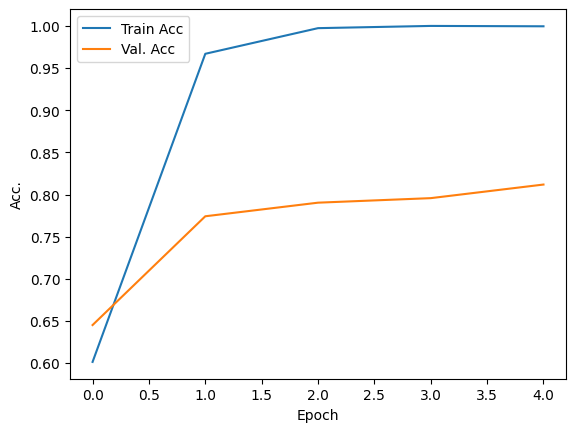

In [156]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val. Acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Acc.")

Text(0, 0.5, 'Loss')

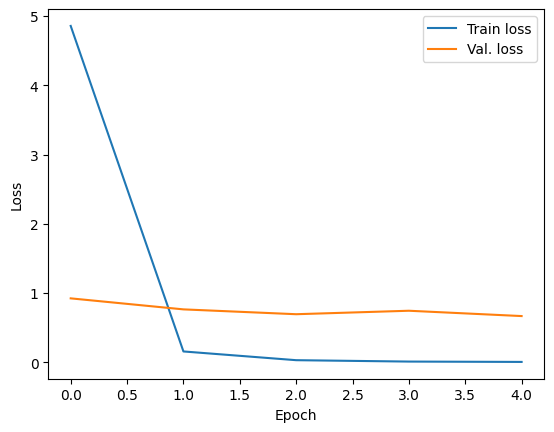

In [157]:
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val. loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

##MLP

In [160]:
MLP = models.Sequential()
MLP.add(layers.Flatten(input_shape=(300, 300, 3)))  # Adjust the input shape to match the data
MLP.add(layers.Dense(256, activation='relu'))
MLP.add(layers.Dense(10, activation='softmax'))
MLP.build(input_shape=(100, 784))
MLP.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 270000)            0         
                                                                 
 dense_26 (Dense)            (None, 256)               69120256  
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 69122826 (263.68 MB)
Trainable params: 69122826 (263.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##MLP COMPILE

In [161]:
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [162]:
history = MLP.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
71/71 [==============================] - 149s 2s/step - loss: 17201.6250 - acc: 0.5238 - val_loss: 3954.2358 - val_acc: 0.6706
Epoch 2/5
71/71 [==============================] - 133s 2s/step - loss: 3700.0034 - acc: 0.7266 - val_loss: 9298.4824 - val_acc: 0.5119
Epoch 3/5
71/71 [==============================] - 128s 2s/step - loss: 4435.4248 - acc: 0.7368 - val_loss: 740.1618 - val_acc: 0.8690
Epoch 4/5
71/71 [==============================] - 125s 2s/step - loss: 2805.7312 - acc: 0.8060 - val_loss: 13945.7734 - val_acc: 0.4365
Epoch 5/5
71/71 [==============================] - 126s 2s/step - loss: 2863.0996 - acc: 0.8219 - val_loss: 2420.7795 - val_acc: 0.8095


In [174]:
MLP_loss, MLP_accuracy = MLP.evaluate(X_test, y_test)

12/12 [==============================] - 3s 268ms/step - loss: 17043.0352 - acc: 0.4543


Text(0, 0.5, 'Acc.')

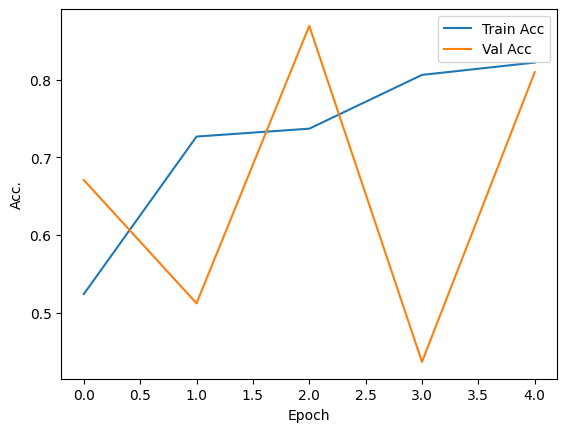

In [164]:
plt.plot(history.history["acc"] , label="Train Acc")
plt.plot(history.history["val_acc"] , label="Val Acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Acc.")

Text(0, 0.5, 'Loss')

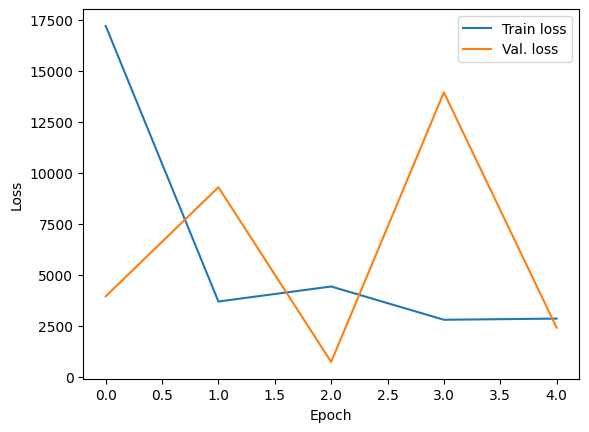

In [165]:
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val. loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

##TABLE

In [167]:
import pandas as pd
from sklearn.metrics import accuracy_score


In [184]:
results = pd.DataFrame({
    'Model': ['MLP', 'CNN'],
    'Loss': [MLP_loss, model],
    'Accuracy': [MLP_accuracy, model]
})
print(results)

  Model                                               Loss  \
0   MLP                                       17043.035156   
1   CNN  <keras.src.engine.sequential.Sequential object...   

                                            Accuracy  
0                                           0.454301  
1  <keras.src.engine.sequential.Sequential object...  
